<center><font color="green">PUBG Game Prediction</font></center>

# **Importing Libraries**

In [2]:
#Standard Libraries
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=(16,6)

import seaborn as sns

#handling warining
import warnings
warnings.filterwarnings("ignore") 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
df=pd.read_csv(r"C:\Users\DELL\Desktop\Data Science\PUBG_Prediction_Model\PUBG_Game_Prediction_data.csv")

In [4]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
df.shape


(4446966, 29)

# **Data Wrapping**

checking for rows with missing wing prediction

In [6]:
#check row with NULL win prediction
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [7]:
df=df.drop(2744604)

In [8]:
#prepare new paramete to know how many player are in a game
df['playersJoined']=df.groupby('matchId')['matchId'].transform('count')

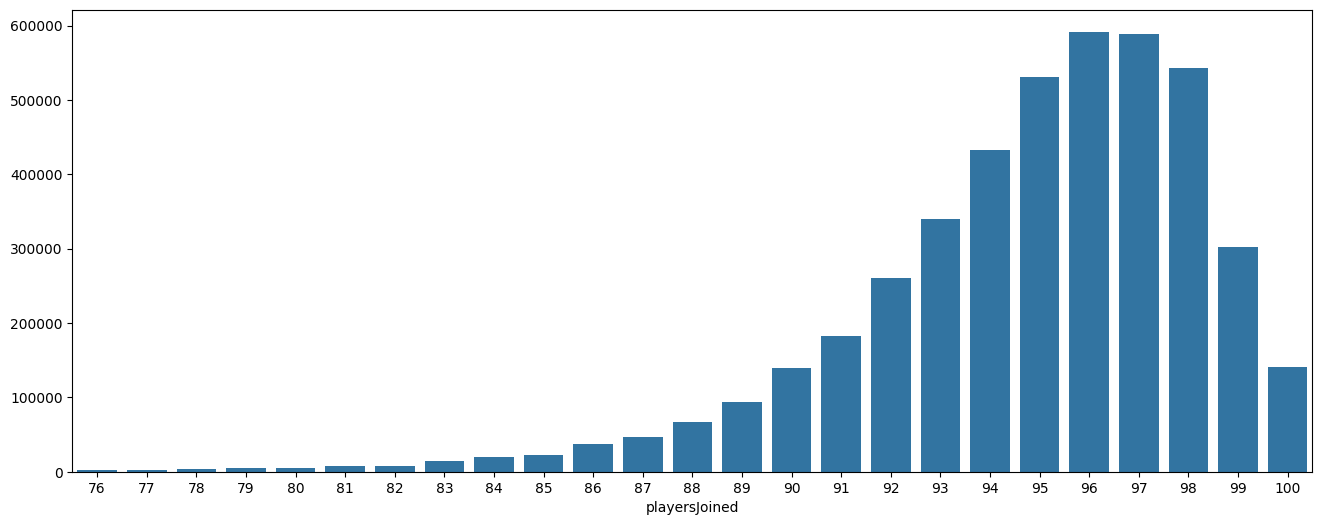

In [9]:
# Get the count of unique values in the 'playersJoined' column where playersJoined > 75
value_counts = df[df['playersJoined'] > 75]['playersJoined'].value_counts()

# Plot the aggregated counts
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.show()

# **Analysing the data**


killing without Moving?

In [10]:
#prepare a data parameter to gather the information of total distance travelled 
df['totalDistance']=df['rideDistance']+df['walkDistance']+df['swimDistance']

#prepare a data parameter to check for anamoly detection that 
#the person has not moved but still managed to do the kills
df['killsWithoutMoving']=((df['kills']>0)&(df['totalDistance']==0))

In [11]:
df['killsWithoutMoving'].sum()

1535

In [12]:
df[df['killsWithoutMoving']==True].head()
df[df['killsWithoutMoving']==True].shape

(1535, 32)

In [13]:
#drop that value
df.drop(df[df['killsWithoutMoving']==True].index, inplace=True)

In [14]:
##Extra ordinary Road Kills
df[df['roadKills']>5].shape

(46, 32)

In [15]:
df.drop(df[df['roadKills']>5].index, inplace=True)

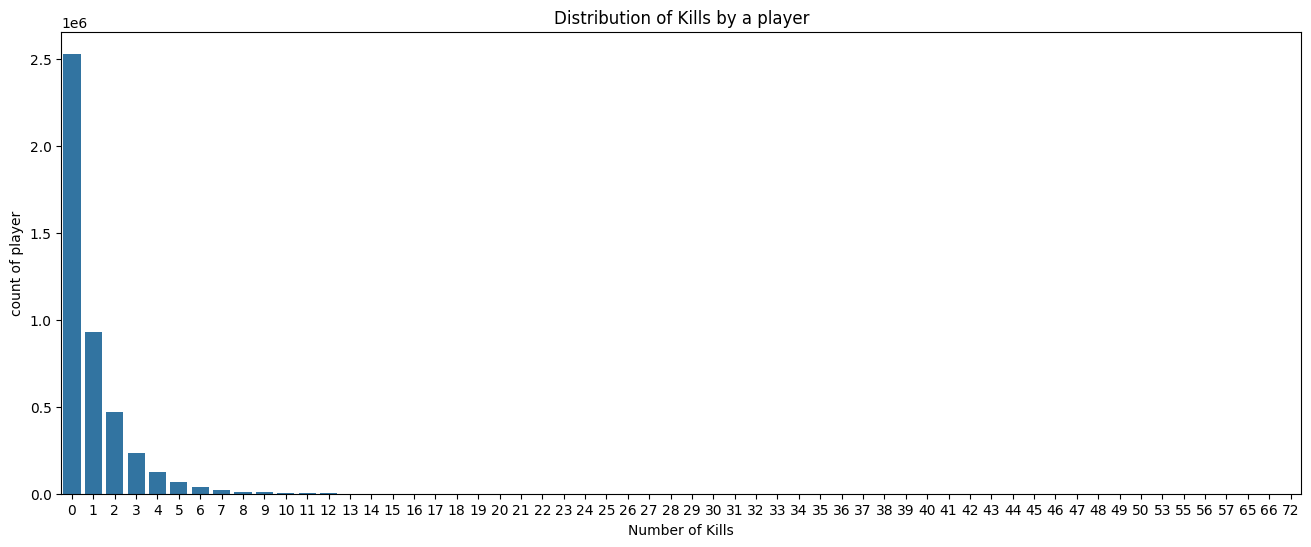

In [16]:
# How many kills
sns.countplot(data=df, x=df['kills']).set_title("Distribution of Kills by a player")
plt.ylabel("count of player")
plt.xlabel("Number of Kills")
plt.show()

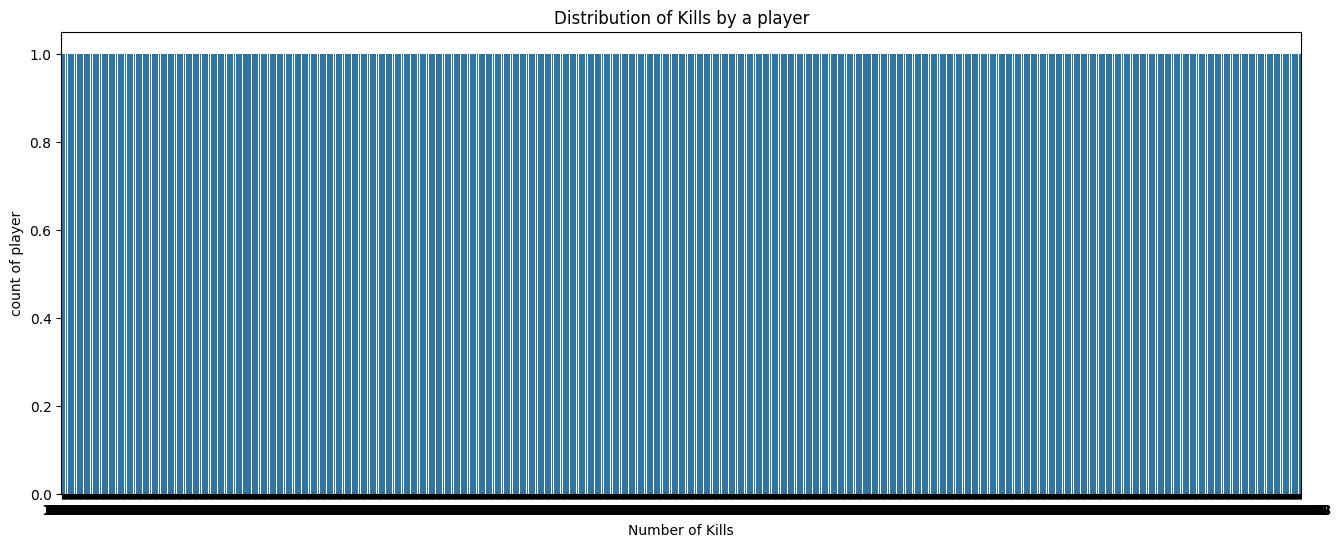

In [17]:
sns.countplot(df[df['kills']>=15]['kills']).set_title("Distribution of Kills by a player")
plt.ylabel("count of player")
plt.xlabel("Number of Kills")
plt.show()

In [18]:
df[df['kills']>20]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killsWithoutMoving
2569,7711e1d39407da,a9fbc63469296f,45fc89f9b11eaf,1,4,2325.0,13,8,2,1,...,0.0,0,0,2697.0,5,1505,1.0000,97,4709.0,False
19531,ef706f0f248dbf,f27e63bfc6746c,7d2fd7f5d4f8b2,9,0,2856.0,32,3,0,1,...,0.0,0,0,1136.0,20,0,0.8000,40,1136.0,False
37505,44513e16340a63,c1e3f56e09b9a4,cf5dd782577ea9,1,2,2767.0,24,17,1,1,...,0.0,0,0,3290.0,7,1509,0.9615,97,5879.0,False
40047,8d8d78ba4e9b55,6634da8e3940de,8a728def0644be,3,0,1988.0,22,6,5,5,...,0.0,0,0,1864.0,33,1500,1.0000,54,3532.0,False
53442,f7a740ffbc2c43,418f6120b2e193,f2614050e9046a,2,0,1906.0,0,4,19,2,...,0.0,0,0,116.7,16,0,1.0000,11,116.7,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4390901,310cdfbe701f03,02b0ccfda16b93,f755207f23cf88,2,4,2645.0,16,8,0,1,...,0.0,0,0,3180.0,7,0,1.0000,91,3180.0,False
4399662,8800992f7dd530,87e52e1a6b0a73,1e573980b3ee3c,1,0,1999.0,0,1,8,5,...,0.0,0,0,111.8,59,1500,0.3333,32,111.8,False
4402706,f69c34cce4d46a,ea800ea1aa6efa,ed092b499ac27d,3,0,2817.0,0,6,2,3,...,0.0,0,0,1147.0,31,1500,0.4000,30,1147.0,False
4420563,0a2721fcf1cdd9,1708576031cf96,fcd20a43cb81ea,6,0,3297.0,0,5,4,1,...,0.0,0,0,253.0,32,0,1.0000,24,253.0,False


In [19]:
#droping that value who killed more than 20 player because it can be done by only extra ordinary people
df.drop(df[df['kills']>20].index, inplace=True)

In [20]:
#Head Shot
#if a player headshot ratio is more than certain percentage that it also comes in pro player category
df['headshot_rate']=df['headshotKills']/df['kills']
df['headshot_rate']=df['headshot_rate'].fillna(0)

In [21]:
df[(df['headshot_rate']==1) & (df['kills']>5)].shape

(187, 33)

In [22]:
df.drop(df[(df['headshot_rate']==1) & (df['kills']>6)].index, inplace=True)

Longest Shot

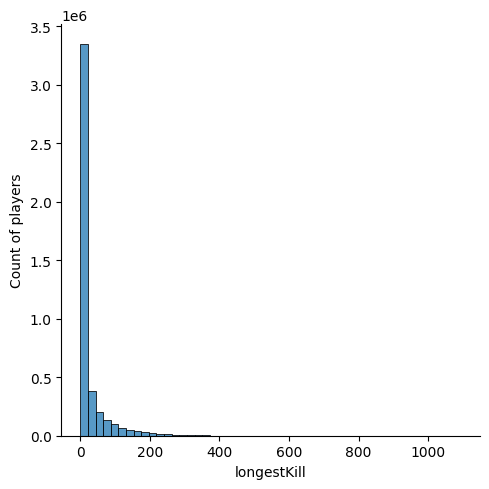

In [23]:
sns.displot(df['longestKill'], bins=50).set_titles("Histogram Showing the LongestKill Distribution")
plt.ylabel("Count of players")
plt.show()

In [24]:
df[df['longestKill']>=500].shape


(1747, 33)

In [25]:
df.drop(df[df['longestKill']>=500].index, inplace=True)

In [26]:
df[df['weaponsAcquired']>=15].shape

(6809, 33)

In [27]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace=True)

# **Feature Engineering**

In [28]:
#Normalizing factor
#means we are normalise kills and all other related column relative to 100 person joining in single match beacuse right now they are not calculated as player joined in game
normalising_factor=(100-df['playersJoined']/100)+1

In [57]:
df['killNorm']=df['kills']*normalising_factor
df['damageDealtNorm']=df['damageDealt']*normalising_factor
df['maxPlaceNorm']=df['maxPlace']*normalising_factor
df['matchDurationNorm']=df['matchDuration']*normalising_factor

df['traveldistance']=df['walkDistance']+df['swimDistance']+df['rideDistance']
df['healsnboost']=df['heals']+df['boosts']
df['assist']=df['assists']+df['revives']

In [59]:
df.shape

(4436306, 40)

In [60]:
data=df.drop(columns=['Id','groupId', 'matchId', 'assists', 'boosts','walkDistance','swimDistance','rideDistance','heals','revives','kills','damageDealt','maxPlace','matchDuration'])

In [61]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killsWithoutMoving,headshot_rate,killNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboost,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


# **ML- Catboost Model**

**Handling Categorical Data**

In [66]:
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

In [68]:
x=pd.get_dummies(x,columns=['matchType','killsWithoutMoving'])

In [69]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killsWithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,False,False,False,False,False,False,False,False,True,True
1,0,0,57,0,0,0.00,25,1484,0,0,...,False,False,False,False,False,False,False,False,True,True
2,0,0,47,0,0,0.00,47,1491,0,0,...,False,False,False,False,False,False,False,False,False,True
3,0,0,75,0,0,0.00,30,1408,0,0,...,False,False,False,False,False,False,False,False,True,True
4,0,0,45,0,1,58.53,95,1560,0,0,...,False,False,False,False,False,False,True,False,False,True


In [70]:
features=x.columns
features

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'numGroups', 'rankPoints', 'roadKills', 'teamKills',
       'vehicleDestroys', 'weaponsAcquired', 'winPoints', 'playersJoined',
       'totalDistance', 'headshot_rate', 'killNorm', 'damageDealtNorm',
       'maxPlaceNorm', 'matchDurationNorm', 'traveldistance', 'healsnboost',
       'assist', 'matchType_crashfpp', 'matchType_crashtpp', 'matchType_duo',
       'matchType_duo-fpp', 'matchType_flarefpp', 'matchType_flaretpp',
       'matchType_normal-duo', 'matchType_normal-duo-fpp',
       'matchType_normal-solo', 'matchType_normal-solo-fpp',
       'matchType_normal-squad', 'matchType_normal-squad-fpp',
       'matchType_solo', 'matchType_solo-fpp', 'matchType_squad',
       'matchType_squad-fpp', 'killsWithoutMoving_False'],
      dtype='object')

In [37]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killsWithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,False,False,False,False,False,False,False,False,True,True
1,0,0,57,0,0,0.00,25,1484,0,0,...,False,False,False,False,False,False,False,False,True,True
2,0,0,47,0,0,0.00,47,1491,0,0,...,False,False,False,False,False,False,False,False,False,True
3,0,0,75,0,0,0.00,30,1408,0,0,...,False,False,False,False,False,False,False,False,True,True
4,0,0,45,0,1,58.53,95,1560,0,0,...,False,False,False,False,False,False,True,False,False,True


In [38]:
x.shape

(4436306, 39)

**Scaling the data**

In [71]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x))

In [72]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.582937,-0.384018,0.449345,1.172485,-0.765100,-0.459622,-0.732886,-1.212390,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192,0.0
1,-0.582937,-0.384018,0.340055,-0.804728,-0.765100,-0.459622,-0.775859,0.803564,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192,0.0
2,-0.582937,-0.384018,-0.024245,-0.804728,-0.765100,-0.459622,0.169557,0.813067,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,-0.808936,0.0
3,-0.582937,-0.384018,0.995795,-0.804728,-0.765100,-0.459622,-0.560992,0.700391,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192,0.0
4,-0.582937,-0.384018,-0.097105,-0.804728,0.647633,0.727371,2.232284,0.906738,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,2.696896,-0.405071,-0.808936,0.0


***Splitting the Data***

In [73]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3, random_state=0)

***Catboost Model***

In [42]:
import catboost as cb

In [76]:
train_dataset=cb.Pool(X_train,Y_train)
test_dataset=cb.Pool(X_test,Y_test)


In [77]:
model=cb.CatBoostRegressor(loss_function='RMSE')

In [78]:
#GRID Search
grid={'iterations':[100,150],
      'learning_rate':[0.03,0.01,1],
      'depth':[2,4,6,8]}
model.grid_search(grid,train_dataset)

0:	learn: 0.5482016	test: 0.5479886	best: 0.5479886 (0)	total: 297ms	remaining: 29.4s
1:	learn: 0.5333650	test: 0.5331566	best: 0.5331566 (1)	total: 509ms	remaining: 24.9s
2:	learn: 0.5189826	test: 0.5187815	best: 0.5187815 (2)	total: 725ms	remaining: 23.4s
3:	learn: 0.5050844	test: 0.5048926	best: 0.5048926 (3)	total: 910ms	remaining: 21.8s
4:	learn: 0.4916276	test: 0.4914432	best: 0.4914432 (4)	total: 1.12s	remaining: 21.3s
5:	learn: 0.4786251	test: 0.4784449	best: 0.4784449 (5)	total: 1.32s	remaining: 20.7s
6:	learn: 0.4660267	test: 0.4658539	best: 0.4658539 (6)	total: 1.53s	remaining: 20.3s
7:	learn: 0.4538495	test: 0.4536820	best: 0.4536820 (7)	total: 1.75s	remaining: 20.1s
8:	learn: 0.4420341	test: 0.4418693	best: 0.4418693 (8)	total: 1.94s	remaining: 19.6s
9:	learn: 0.4306331	test: 0.4304748	best: 0.4304748 (9)	total: 2.14s	remaining: 19.3s
10:	learn: 0.4195967	test: 0.4194453	best: 0.4194453 (10)	total: 2.33s	remaining: 18.9s
11:	learn: 0.4089243	test: 0.4087765	best: 0.4087765

{'params': {'depth': 8, 'learning_rate': 1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
      

In [79]:
print(len(features))
print(len(model.feature_importances_))

40
40


In [80]:
feature_importance_df=pd.DataFrame()
feature_importance_df['features']=features
feature_importance_df['importance']=model.feature_importances_

feature_importance_df=feature_importance_df.sort_values(by=['importance'],ascending=False)

In [ ]:
feature_importance_df

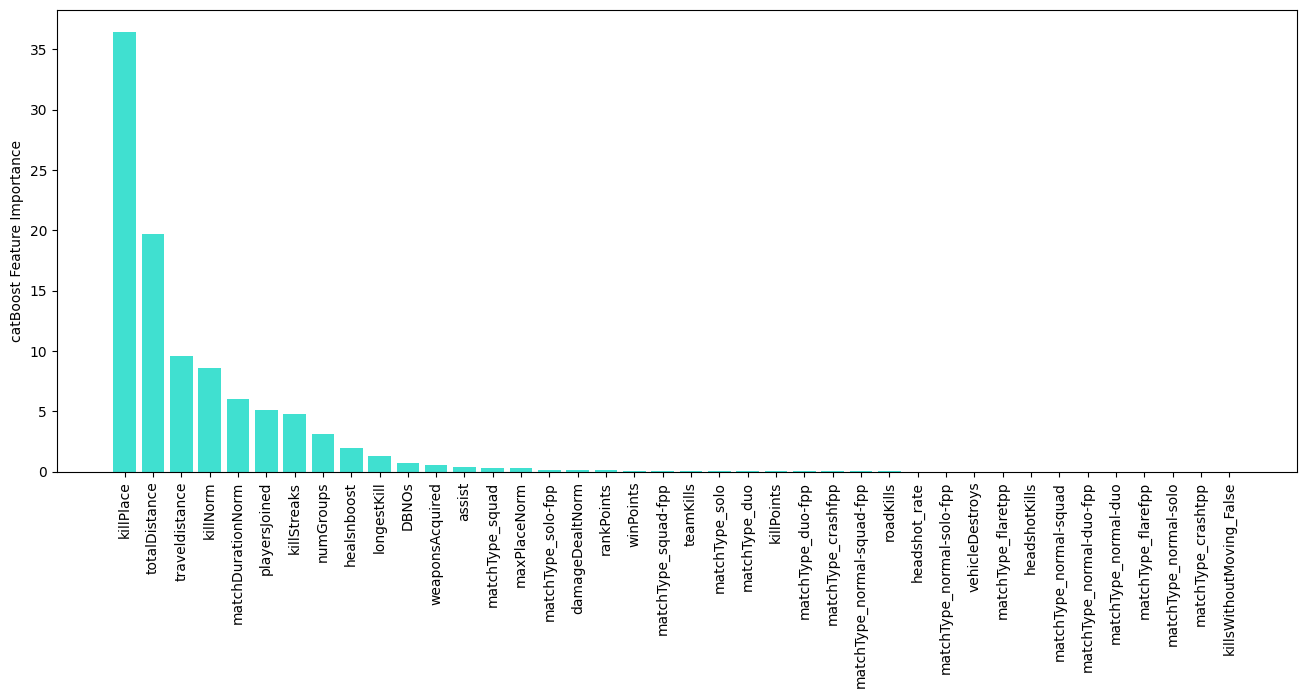

In [82]:
plt.bar(feature_importance_df.features, feature_importance_df.importance, color='turquoise')
plt.ylabel("catBoost Feature Importance")
plt.xticks(rotation=90)
plt.show()

***Prdiction***

In [83]:
pred=model.predict(X_test)

In [84]:
Y_test[:10]

2744392    0.1154
588225     0.0000
234695     0.6538
733635     0.8864
4321842    0.9896
3502031    0.0000
1954991    0.2143
4113203    0.3696
3378367    0.5333
2228830    0.1978
Name: winPlacePerc, dtype: float64

In [85]:
pred[:10]

array([ 0.05252125,  0.01137755,  0.51999215,  0.84445266,  0.85937731,
       -0.01575463,  0.2543643 ,  0.38122331,  0.6870055 ,  0.18619471])

In [86]:
rmse=np.sqrt(mean_squared_error(Y_test,pred))
r2=r2_score(Y_test,pred)
print("Testing Performance")
print("RMSE: {:.2f}".format(rmse))
print("R2:{:.2f}".format(r2))

Testing Performance
RMSE: 0.08
R2:0.93
